In [1]:
!python run_preds.py -c testing_files\cfgs\json_cfg.json

Загружаю датасет
Датасет загружен
количество tp изображений: 527
количество tp изображений: 527

Имя модели: model_epoch-01.h5
Прогон тестового набора...

Имя модели: model_epoch-03.h5
Прогон тестового набора...

Имя модели: model_epoch-05.h5
Прогон тестового набора...

Имя модели: model_epoch-07.h5
Прогон тестового набора...

Имя модели: model_epoch-08.h5
Прогон тестового набора...

Имя модели: model_epoch-09.h5
Прогон тестового набора...

Имя модели: model_epoch-10.h5
Прогон тестового набора...

Имя модели: model_epoch-121.h5
Прогон тестового набора...

2021-03-29 19:21:29.879424: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-03-29 19:21:39.064613: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-29 19:21:39.066265: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-03-29 19:21:3

In [2]:
!python check_pred_data.py -c testing_files\cfgs\json_cfg.json

Предикты модели model_epoch-01
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-03
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-05
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-07
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-08
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-09
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-10
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-121
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-122
Тип данных: tp
Количество изобр

In [3]:
!python calculate_metrics.py -c testing_files\cfgs\json_cfg.json

    Произвожу расчет порога модели model_epoch-01^
     Загружаю данные...
     Произвожу расчет и оценку...
[0, 527, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-03^
     Загружаю данные...
     Произвожу расчет и оценку...
[396, 131, 38, 489]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-05^
     Загружаю данные...
     Произвожу расчет и оценку...
[481, 46, 30, 497]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-07^
     Загружаю данные...
     Произвожу расчет и оценку...
[511, 16, 44, 483]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-08^
     Загружаю данные...
     Произвожу расчет и оценку...
[457, 70, 12, 515]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-09^
     Загружаю данные...
     Произвожу расчет и оценку...
[504, 23, 32, 495]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-10^
     Загружаю 

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import utils

In [7]:
acc_json_names = os.listdir('testing_files\\tiny_32_1\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\tiny_32_1\\results\\json_roc_auc_data')
result_dir = 'testing_files\\tiny_32_1\\results'

In [6]:
def get_acc_model_name(json_name):
    return json_name[16:].split('.')[0]

def get_auc_model_name(json_name):
    return json_name[19:].split('.')[0]

def load_metrics(acc_json_names, auc_json_names, result_dir):
    acc_dir = os.path.join(result_dir, 'json_acc_data')
    auc_dir = os.path.join(result_dir, 'json_roc_auc_data')
    num_models = len(acc_json_names)
    metric_data = {}
    for i in range(num_models):
        acc_json_name = acc_json_names[i]
        auc_json_name = auc_json_names[i]
        model_name = int(acc_json_name.split('-')[-1].split('.')[0])
        acc_pth = os.path.join(acc_dir, acc_json_name)
        auc_pth = os.path.join(auc_dir, auc_json_name)
        metric_data[model_name] = {'acc': utils.get_json_data(acc_pth)['accuracy'], 'auc': utils.get_json_data(auc_pth)['auc']}
    return metric_data

def get_acc_auc(metric_data, epochs):
    acc = []
    auc = []
    for epoch in epochs:
        acc.append(metric_data[epoch]['acc'])
        auc.append(metric_data[epoch]['auc'])
    return acc, auc 

In [8]:
metric_data = load_metrics(acc_json_names, auc_json_names, result_dir)

In [11]:
metric_data

{1: {'acc': 0.5, 'auc': 0.5},
 3: {'acc': 0.8396584440227703, 'auc': 0.8396584440227703},
 5: {'acc': 0.9278937381404174, 'auc': 0.9278937381404174},
 7: {'acc': 0.9430740037950665, 'auc': 0.9430740037950665},
 8: {'acc': 0.9222011385199241, 'auc': 0.922201138519924},
 9: {'acc': 0.9478178368121443, 'auc': 0.9478178368121443},
 10: {'acc': 0.952561669829222, 'auc': 0.952561669829222},
 121: {'acc': 0.9933586337760911, 'auc': 0.993358633776091},
 122: {'acc': 0.9943074003795066, 'auc': 0.9943074003795066},
 135: {'acc': 0.9943074003795066, 'auc': 0.9943074003795065},
 15: {'acc': 0.9753320683111955, 'auc': 0.9753320683111953},
 16: {'acc': 0.959203036053131, 'auc': 0.959203036053131},
 18: {'acc': 0.9753320683111955, 'auc': 0.9753320683111955},
 19: {'acc': 0.9743833017077799, 'auc': 0.9743833017077799},
 20: {'acc': 0.9772296015180265, 'auc': 0.9772296015180265},
 207: {'acc': 0.9933586337760911, 'auc': 0.993358633776091},
 212: {'acc': 0.9933586337760911, 'auc': 0.993358633776091},
 2

In [9]:
epochs = list(metric_data.keys())
epochs = sorted(epochs)
acc, auc = get_acc_auc(metric_data, epochs)

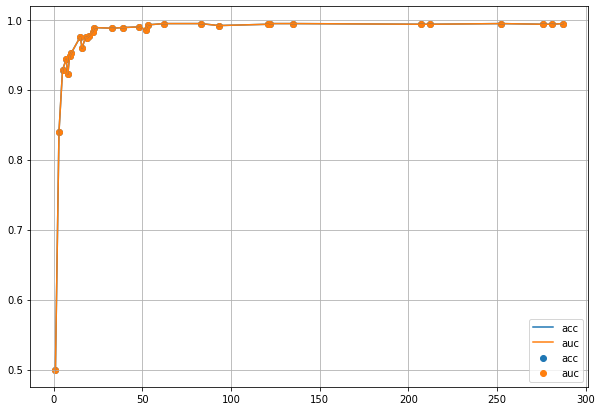

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(epochs[:-1], acc[:-1], label='acc')
plt.scatter(epochs[:-1], acc[:-1], label='acc')
plt.plot(epochs[:-1], auc[:-1], label='auc')
plt.scatter(epochs[:-1], auc[:-1], label='auc')
plt.legend()
plt.grid('on')
plt.show()

In [17]:
human_df = pd.read_csv('testing_files\\tiny_32_1\\csv_conf\\model_epoch-287\\output_model_epoch-287_tp.csv')
bg_df = pd.read_csv('testing_files\\tiny_32_1\\csv_conf\\model_epoch-287\\output_model_epoch-287_bg.csv')

In [16]:
human_df[human_df['max_conf'] != 1]

,Unnamed: 0,img_name,max_conf,iou,box
363,363,v8_11_0_10_0.jpg,0,0.0,[]
448,448,v8_18_0_40_2.jpg,0,0.0,[]


In [19]:
bg_df[bg_df['max_conf'] == 1]

,Unnamed: 0,img_name,max_conf,iou,box
86,86,11920.jpg,1,-,"[4.990915775299072, 2.676133155822754, 20.5185..."
120,120,12923.jpg,1,-,"[11.56484603881836, 2.3554344177246094, 29.503..."
260,260,366.jpg,1,-,"[7.040993690490723, 1.3165749311447144, 23.962..."
526,526,9989.jpg,1,-,"[8.91159439086914, 0.6406216025352478, 19.7176..."
